Data Fields

datetime - hourly date + timestamp  

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 
1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

Evaluation
Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE).

분류와 회귀중 회귀와 관련 된 문제 => 자전거 대여량을 예측하는 문제이기 때문에(Supervised)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
#왜 자꾸 파일 경로 설정 제대로 했는데 읽어오지를 못하는 거지?
# \t를 공백문자로 인식해서 train.csv를 읽어오지 못하여 파일 이름을 churain으로 변경해줌

churain = pd.read_csv("D:\Python EXAM\Bike Sharing Demand_2017\churain.csv", parse_dates=['datetime'])
#parse_dates = ['column 명'] -> 해당 컬럼의 데이터 타입을 datetime64로 형변환 해주는 것

churain2 = pd.read_csv("D:\Python EXAM\Bike Sharing Demand_2017\churain.csv")

churain.shape

(10886, 12)

In [3]:
churain.info()

print('--------')

churain2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB
--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10

* churain은 날짜 데이터를 datetime64 형식으로 바꾼 것 parse_dates =['column']

* churain2는 따로 바꿔주지 않아서 datetime의 type이 object로 나타나는 것을 볼 수 있다.

In [4]:
churain.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
#temp에 대해서 자세한 정보
churain.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [6]:
# null값이 있는지 있다면 몇 개인지 다 더해라. 메소드
churain.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
#datetime에 담겨져 있던 하나의 '2001-05-29 03:00:00 '를
#각각의 column에 나눠서 담아주는 것

churain['year'] = churain['datetime'].dt.year
churain['month'] = churain['datetime'].dt.month
churain['day'] = churain['datetime'].dt.day
churain['hour'] = churain['datetime'].dt.hour
churain['minute'] = churain['datetime'].dt.minute
churain['second'] = churain['datetime'].dt.second
churain.shape

(10886, 18)

In [9]:
churain.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


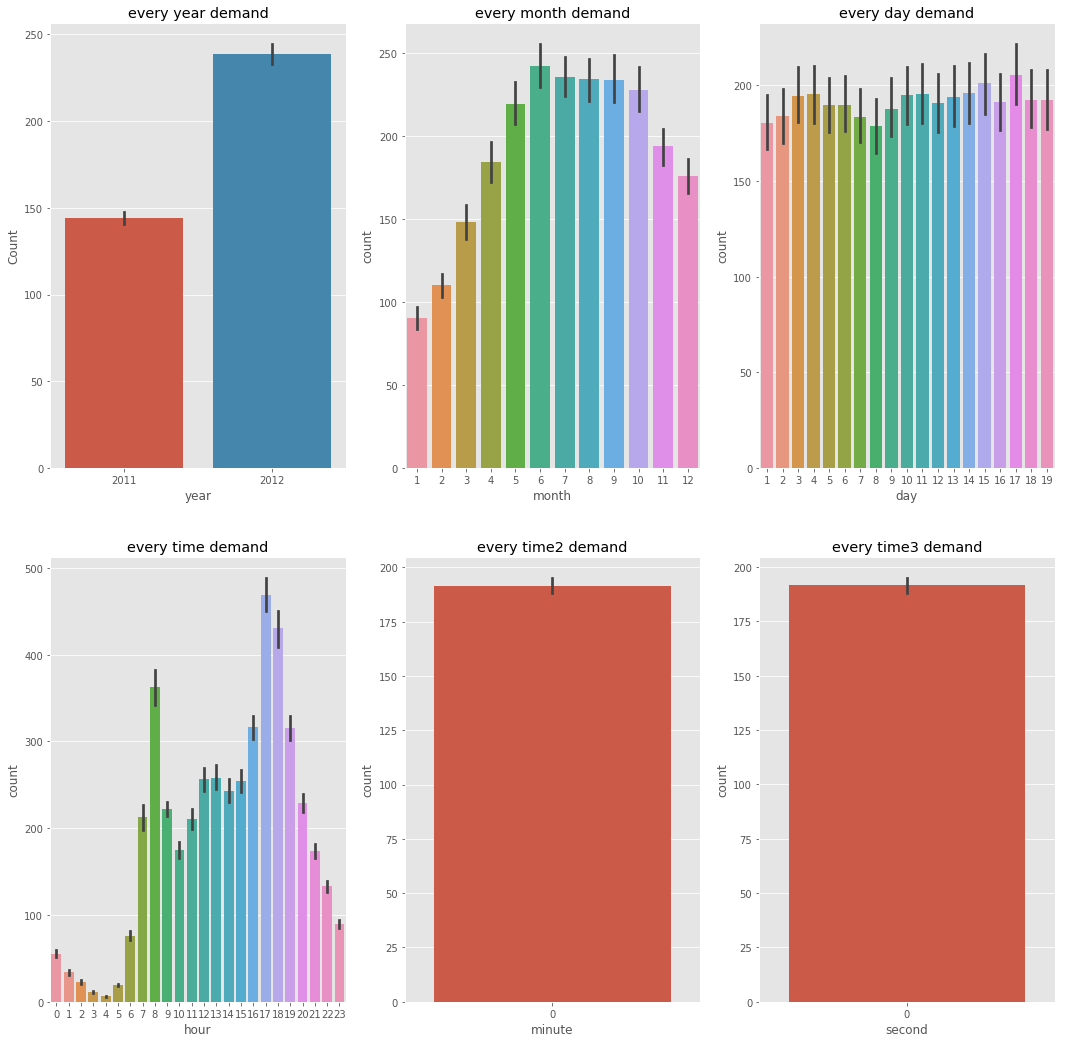

In [11]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3) #2행 3열의 6개 그래프
figure.set_size_inches(18,18) #가로,세로 길이

sns.barplot(data=churain, x="year", y="count", ax=ax1)
sns.barplot(data=churain, x="month", y="count", ax=ax2)
sns.barplot(data=churain, x="day", y="count", ax=ax3)
sns.barplot(data=churain, x="hour", y="count", ax=ax4)
sns.barplot(data=churain, x="minute", y="count", ax=ax5)
sns.barplot(data=churain, x="second", y="count", ax=ax6)

ax1.set(ylabel='Count',title="every year demand")
ax2.set(xlabel='month',title="every month demand")
ax3.set(xlabel='day', title="every day demand")
ax4.set(xlabel='hour', title="every time demand")
ax5.set(xlabel='minute', title="every time2 demand")
ax6.set(xlabel='second', title="every time3 demand");

# fig, axex = plt.subplots(nrows=2, ncols=2)
# figure.set_size_inches(18,18)

# sns.barplot(data=churain, x='year',y='count',ax=axes[0][0])
# sns.barplot(data=churain, x='month',y='count',ax=axes[0][1])
# sns.barplot(data=churain, x='day',y='count',ax=axes[1][0])
# sns.barplot(data=churain, x='hour',y='count',ax=axes[1][1])


# axes[0][0].set(title='every year demand',ylabel='Count')
# axes[0][1].set(title='every year demand',xlabel='month')
# axes[1][0].set(title='every year demand',xlabel='day')
# axes[1][1].set(title='every year demand',xlabel='hour')




* 연도별 대여량은 2011년 보다 2012년이 더 많다.

* 월별 대여량은 6월에 가장 많다. 비교적 따뜻한 시기에 대여량이 많은 추세를 보인다.

  (겨울에는 추워서 자전거 타기가 좀 그렇지?
  

* 일별대여량은 1일부터 19일까지만 있고 나머지 날짜는 test.csv에 있다. 그래서 이 데이터는 피처로 사용하면 안 된다.

* 시간 대 대여량을 보면 출퇴근 시간에 대여량이 많은 것 같다. 하지만 주말과 나누어 볼 필요가 있을 것 같다.

* 분, 초도 다 0이기 때문에 의미가 없다.

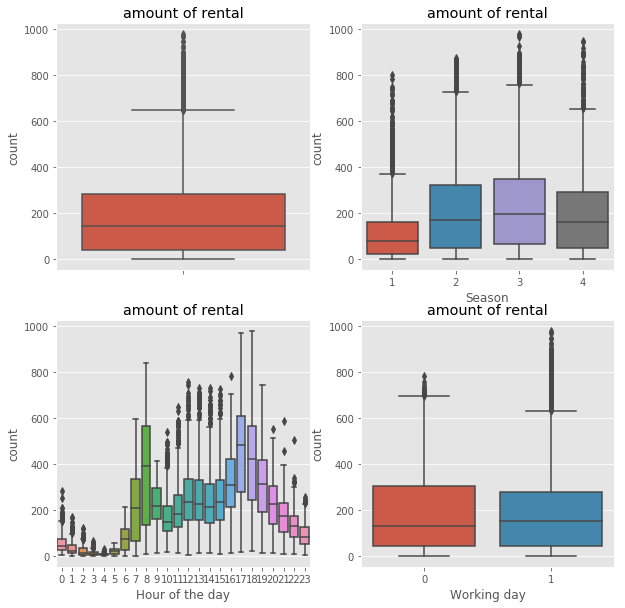

In [13]:
# 1번 형식
# 개인적으로 1번 형식이 더 편한 것 같다.
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(10,10)
sns.boxplot(data=churain, y='count', orient='v', ax = ax1)
sns.boxplot(data=churain, y='count', x='season', ax = ax2)
sns.boxplot(data=churain, y='count', x='hour', ax = ax3)
sns.boxplot(data=churain, y='count', x='workingday',ax = ax4)

ax1.set(ylabel='count',title='amount of rental')
ax2.set(xlabel='Season', ylabel = 'count' , title='amount of rental')
ax3.set(xlabel='Hour of the day', ylabel = 'count' , title='amount of rental')
ax4.set(xlabel='Working day', ylabel = 'count' , title='amount of rental');


# 2번 형식
# fig, axes = plt.subplots(nrows=2,ncols=2)
# fig.set_size_inches(12, 10)
# sns.boxplot(data=train,y="count",orient="v",ax=axes[0][0])
# sns.boxplot(data=train,y="count",x="season",orient="v",ax=axes[0][1])
# sns.boxplot(data=train,y="count",x="hour",orient="v",ax=axes[1][0])
# sns.boxplot(data=train,y="count",x="workingday",orient="v",ax=axes[1][1])

# axes[0][0].set(ylabel='Count',title="대여량")
# axes[0][1].set(xlabel='Season', ylabel='Count',title="계절별 대여량")
# axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="시간별 대여량")
# axes[1][1].set(xlabel='Working Day', ylabel='Count',title="근무일 여부에 따른 대여량")

In [16]:
#함수 정의 year,month 붙여줘 
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)


churain["year_month"] = churain["datetime"].apply(concatenate_year_month)

print(churain.shape)
churain[["datetime", "year_month"]].head()

(10886, 19)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


In [17]:
churain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
year_month    10886 non-null object
dtypes: datetime64[ns](1), float64(3), int64(14), object(1)
memory usage: 1.6+ MB


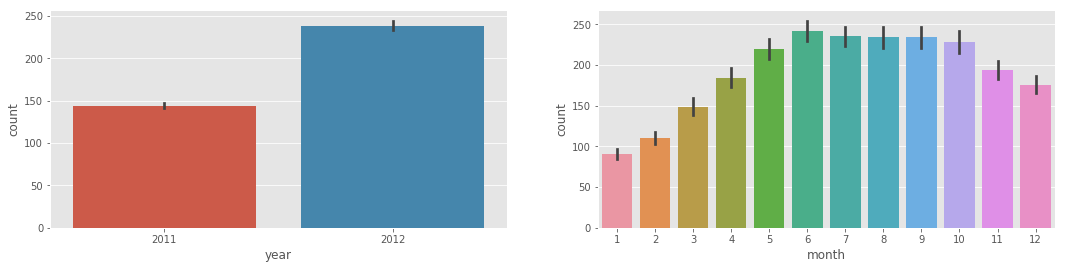

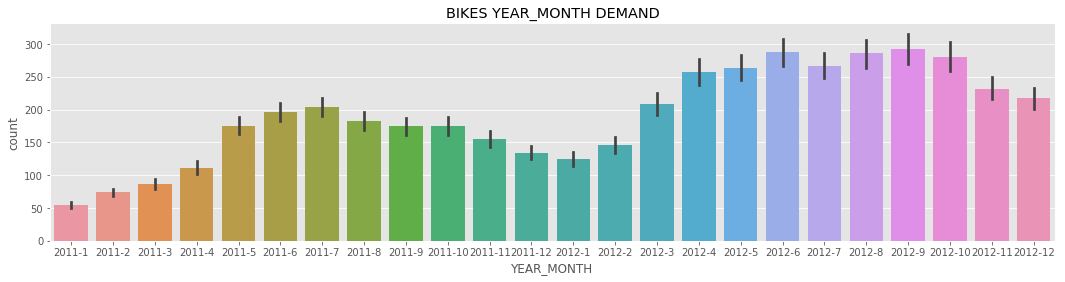

In [19]:
figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)

sns.barplot(data=churain, x='year', y='count', ax=ax1)
sns.barplot(data=churain, x='month', y='count', ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)

sns.barplot(data=churain, x='year_month',y='count', ax=ax3)
ax3.set(xlabel='YEAR_MONTH', title='BIKES YEAR_MONTH DEMAND');

In [26]:
# trainWithoutOutliers
churainWithoutOutliers = churain[np.abs(churain["count"] - churain["count"].mean()) <= (3*churain["count"].std())]

print(churain.shape)
print(churainWithoutOutliers.shape)# count값의 데이터 분포도를 파악

(10886, 19)
(10739, 19)


(10886, 19)
(10739, 19)


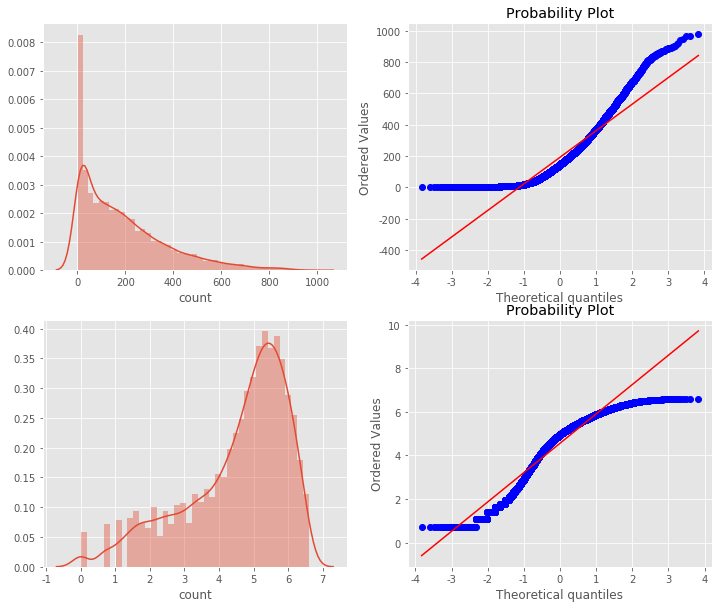

In [25]:
figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(churain["count"], ax=axes[0][0])
stats.probplot(churain["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(churainWithoutOutliers["count"]), ax=axes[1][0])
stats.probplot(np.log1p(churainWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1]);